In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import pearsonr
%matplotlib inline


### Funcion: get_features_num_regression

Esta función recibe como argumentos un dataframe, el nombre de una de las columnas del mismo (argumento 'target_col'), que debería ser el target de un hipotético modelo de regresión, es decir debe ser una variable numérica continua o discreta pero con alta cardinalidad, además de un argumento 'umbral_corr', de tipo float que debe estar entre 0 y 1 y una variable float "pvalue" cuyo valor debe ser por defecto "None".

La función debe devolver una lista con las columnas numéricas del dataframe cuya correlación con la columna designada por "target_col" sea superior en valor absoluto al valor dado por "umbral_corr". Además si la variable "pvalue" es distinta de None, sólo devolvera las columnas numéricas cuya correlación supere el valor indicado y además supere el test de hipótesis con significación mayor o igual a 1-pvalue.

La función debe hacer todas las comprobaciones necesarias para no dar error como consecuecia de los valores de entrada. Es decir hará un check de los valores asignados a los argumentos de entrada y si estos no son adecuados debe retornar None y printar por pantalla la razón de este comportamiento. Ojo entre las comprobaciones debe estar que "target_col" hace referencia a una variable numérica continua del dataframe.

In [53]:
def get_features_num_reggresion(df,target_col, umbral_corr,pvalue=None):
    if target_col not in df.columns:
        """
    get_features_num_regresion: selecciona las características numéricas para un problema de regrersión. 
    Esta función verifica que los datos sean adecuados y automáticamente selecciona las columnas numéricas que
    están más relacionadas con la que estamos tratando. Sirve para hacer predicciones más precisas.

    Argumentos:
     - df (DataFrame): El conjunto de datos.
     - target_col (str): El nombre de la columna objetivo que queremos predecir.
     - umbral_corr (float): Umbral de correlación para seleccionar características (entre 0 y 1).
     - pvalue (float, opcional): Umbral de significación estadística (entre 0 y 1) para el test de correlación. Por defecto, None.

    Retorna:
    - selected_features (list): Lista de características seleccionadas que cumplen con los criterios.
    """  
    
    if not np.issubdtype(df[target_col].dtype, np.number):# Comprobar que la columna objetivo es una variable numérica continua
        print(f"Error: La columna '{target_col}' no es una variable numérica continua.")
        return None
    
    if not (0 <= umbral_corr <= 1): # Comprobar que el umbral de correlación está entre 0 y 1
        print("Error: umbral_corr debe estar entre 0 y 1")
        return None 
    
    if pvalue is not None and not (0 <= pvalue <= 1):# Comprobar que pvalue es None o un número entre 0 y 1
        print("Error: pvalue debe ser None o un número entre 0 y 1.")
        return None
    
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()  # Obtener columnas numéricas del DataFrame

    Correlations = []  # Calcular la correlación y p-values para cada columna numérica con 'target_col'
    for col in numeric_cols:
        if col != target_col:
            correlation, p_value = pearsonr(df[col], df[target_col])
            Correlations.append((col, correlation, p_value))

    Selected_features = []  # Filtrar las columnas basadas en el umbral de correlación y p-value
    for col, corr, p_value in Correlations:
        if abs(corr) > umbral_corr and (pvalue is None or p_value <= (1 - pvalue)):
            Selected_features.append(col)
    return Selected_features






In [72]:
features = get_features_num_regression1(df1, 'pdays', 0.2, pvalue=0.05)
print(features)

['previous']


### Funcion: plot_features_num_regression

Esta función recibe un dataframe, una argumento "target_col" con valor por defecto "", una lista de strings ("columns") cuyo valor por defecto es la lista vacía, un valor de correlación ("umbral_corr", con valor 0 por defecto) y un argumento ("pvalue") con valor "None" por defecto.

Si la lista no está vacía, la función pintará una pairplot del dataframe considerando la columna designada por "target_col" y aquellas incluidas en "column" que cumplan que su correlación con "target_col" es superior en valor absoluto a "umbral_corr", y que, en el caso de ser pvalue diferente de "None", además cumplan el test de correlación para el nivel 1-pvalue de significación estadística. La función devolverá los valores de "columns" que cumplan con las condiciones anteriores. 

EXTRA: Se valorará adicionalmente el hecho de que si la lista de columnas a pintar es grande se pinten varios pairplot con un máximo de cinco columnas en cada pairplot (siendo siempre una de ellas la indicada por "target_col")

Si la lista está vacía, entonces la función igualará "columns" a las variables numéricas del dataframe y se comportará como se describe en el párrafo anterior.

De igual manera que en la función descrita anteriormente deberá hacer un check de los valores de entrada y comportarse como se describe en el último párrafo de la función `get_features_num_regresion`

In [70]:
def plot_features_num_regression(dataframe, target_col="", columns=[], umbral_corr=0, pvalue=None):
    """
    Genera un pairplot para características numéricas basado en la correlación con la columna objetivo.

    Parámetros:
    - dataframe (pd.DataFrame): DataFrame de entrada.
    - target_col (str, opcional): Columna objetivo para el análisis de correlación.
    - columns (lista de str, opcional): Lista de columnas para el pairplot. Por defecto, es una lista vacía.
    - umbral_corr (float, opcional): Umbral de correlación. Por defecto, es 0.
    - pvalue (float o None, opcional): Valor p para el test de significación estadística de la correlación. Por defecto, es None.

    Retorna:
    - lista de str: Lista de columnas que cumplen con las condiciones específicas.
    """

    # Valoresde entrada
    if not isinstance(dataframe, pd.DataFrame):
        raise ValueError("El argumento 'dataframe' debe ser un DataFrame de pandas.")

    if target_col not in dataframe.columns:
        raise ValueError("La columna objetivo '{}' no se encuentra en el dataframe.".format(target_col))

    if not isinstance(columns, list):
        raise ValueError("'columns' debe ser una lista de strings.")

    if not all(col in dataframe.columns for col in columns):
        raise ValueError("Todas las columnas en 'columns' deben existir en el dataframe.")

    if not isinstance(umbral_corr, (int, float)):
        raise ValueError("'umbral_corr' debe ser un valor numérico.")

    if not (isinstance(pvalue, (float, int)) or pvalue is None):
        raise ValueError("'pvalue' debe ser un valor numérico o None.")

    if not columns: # Si 'columns' está vacío, utiliza todas las columnas numéricas
        columns = dataframe.select_dtypes(include=['number']).columns.tolist()

    selected_columns = []  # Filtra las columnas basadas en la correlación y el valor p
    for col in columns:
        if col != target_col:
            correlation, p_val = pearsonr(dataframe[col], dataframe[target_col])

            if abs(correlation) > umbral_corr and (pvalue is None or p_val < pvalue):
                selected_columns.append(col)



    #  pairplot para las columnas seleccionadas
    if selected_columns:
        num_plots = len(selected_columns) // 4 + 1
        for i in range(num_plots):
            start_index = i * 4
            end_index = (i + 1) * 4
            subset_columns = [target_col] + selected_columns[start_index:end_index]
            
            subset_data = dataframe[subset_columns]
            sns.pairplot(subset_data, diag_kind='kde')
            plt.show()

    return selected_columns


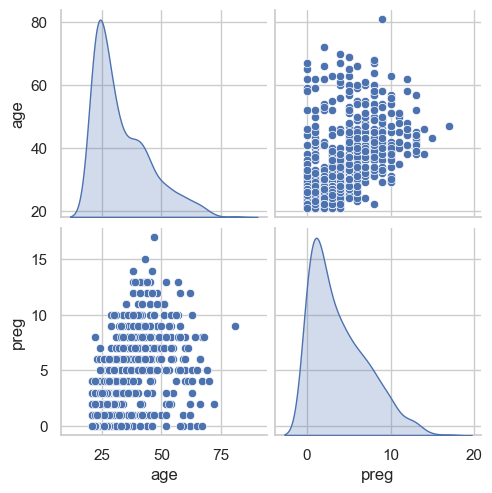

['preg']

In [77]:

plot_features_num_regression(df, target_col='age', umbral_corr=0.5, pvalue=0.05)


In [62]:
df1=pd.read_csv("./data./bank-full.csv", delimiter = ";")

df1.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [36]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
df = pd.read_csv(url, header=None, names=names)

# Imprimir las primeras filas del DataFrame
df.head()


,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
